In [1]:
import torch
from tqdm.auto import tqdm
torch.manual_seed(0)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from Data_Loader import *
from Generator import *
from Discriminator import *

In [4]:
target = FilteredDataset(dataset,'Happy')

[140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279]


In [5]:
import torch.nn.functional as F

adv_criterion = nn.MSELoss()
recon_criterion = nn.L1Loss()

n_epochs = 10
dim_A = 3
dim_B = 3
display_step = 200
batch_size = 1
lr = 0.0002
device = 'cuda'

In [6]:
gen_AB = Generator(dim_A, dim_B).to(device)
gen_BA = Generator(dim_B, dim_A).to(device)
gen_opt = torch.optim.Adam(list(gen_AB.parameters()) + list(gen_BA.parameters()), lr=lr, betas=(0.5, 0.999))
disc_A = Discriminator(dim_A).to(device)
disc_A_opt = torch.optim.Adam(disc_A.parameters(), lr=lr, betas=(0.5, 0.999))
disc_B = Discriminator(dim_B).to(device)
disc_B_opt = torch.optim.Adam(disc_B.parameters(), lr=lr, betas=(0.5, 0.999))

def weights_init(m):
    if isinstance(m, nn.Conv2d) or isinstance(m, nn.ConvTranspose2d):
        torch.nn.init.normal_(m.weight, 0.0, 0.02)
    if isinstance(m, nn.BatchNorm2d):
        torch.nn.init.normal_(m.weight, 0.0, 0.02)
        torch.nn.init.constant_(m.bias, 0)

pretrained =False
if pretrained:
    pre_dict = torch.load('cycleGAN_100000.pth')
    gen_AB.load_state_dict(pre_dict['gen_AB'])
    gen_BA.load_state_dict(pre_dict['gen_BA'])
    gen_opt.load_state_dict(pre_dict['gen_opt'])
    disc_A.load_state_dict(pre_dict['disc_A'])
    disc_A_opt.load_state_dict(pre_dict['disc_A_opt'])
    disc_B.load_state_dict(pre_dict['disc_B'])
    disc_B_opt.load_state_dict(pre_dict['disc_B_opt'])
else:
    gen_AB = gen_AB.apply(weights_init)
    gen_BA = gen_BA.apply(weights_init)
    disc_A = disc_A.apply(weights_init)
    disc_B = disc_B.apply(weights_init)

In [7]:
def get_identity_loss(real_X, gen_YX, identity_criterion):

    identity_X = gen_YX(real_X)
    identity_loss = identity_criterion(real_X, identity_X)
    return identity_loss, identity_X

In [8]:
def get_cycle_consistency_loss(real_X, fake_Y, gen_YX, cycle_criterion):

    cycle_X = gen_YX(fake_Y)
    cycle_loss = cycle_criterion(real_X, cycle_X)

    return cycle_loss, cycle_X

In [9]:
len(dataset),len(target)

(700, 140)

torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
Epoch 0: Step 0: Generator (U-Net) loss: 0.09676072120666504, Discriminator loss: 0.002602636516094208


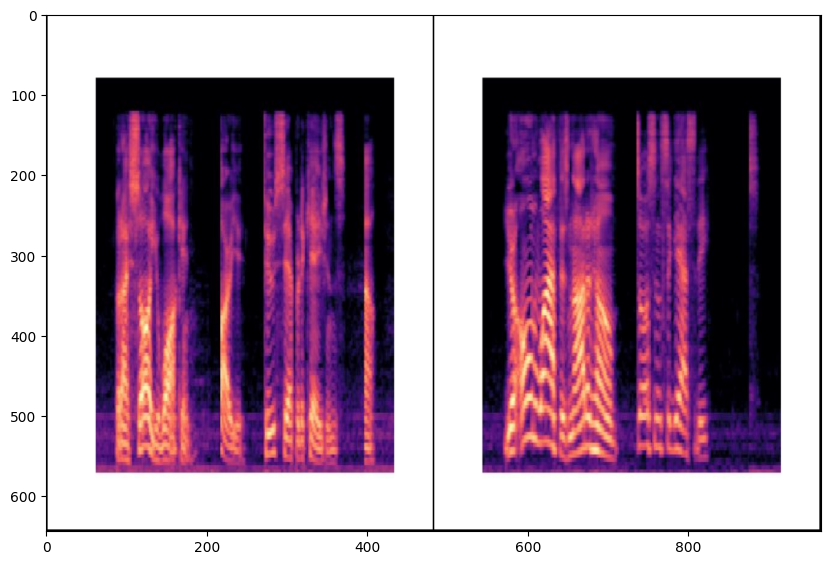

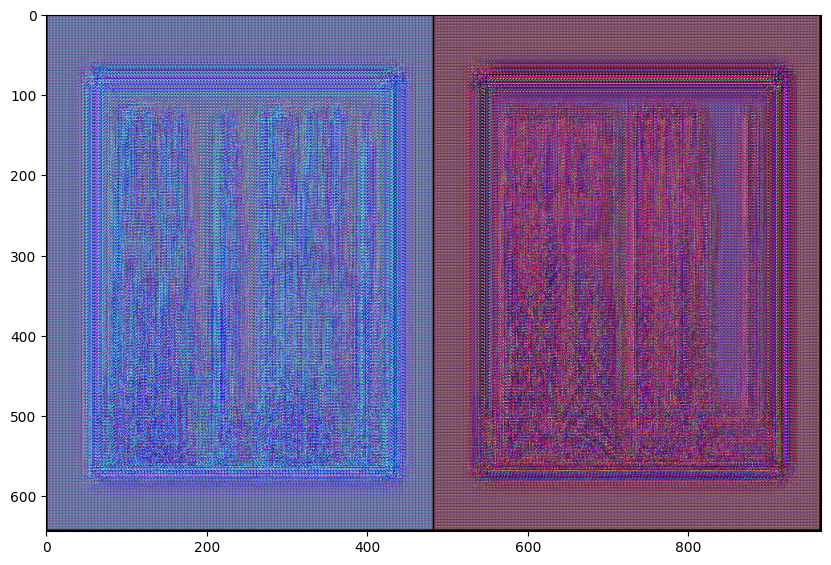

torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1,

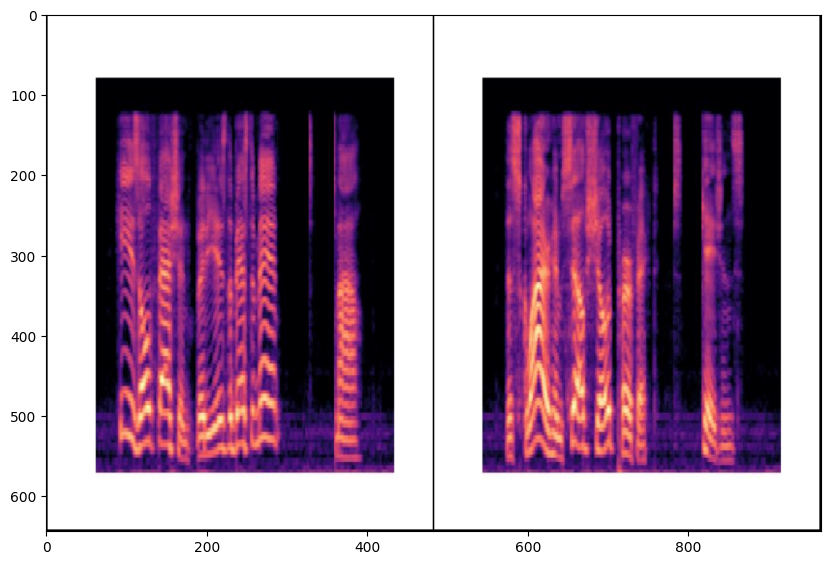

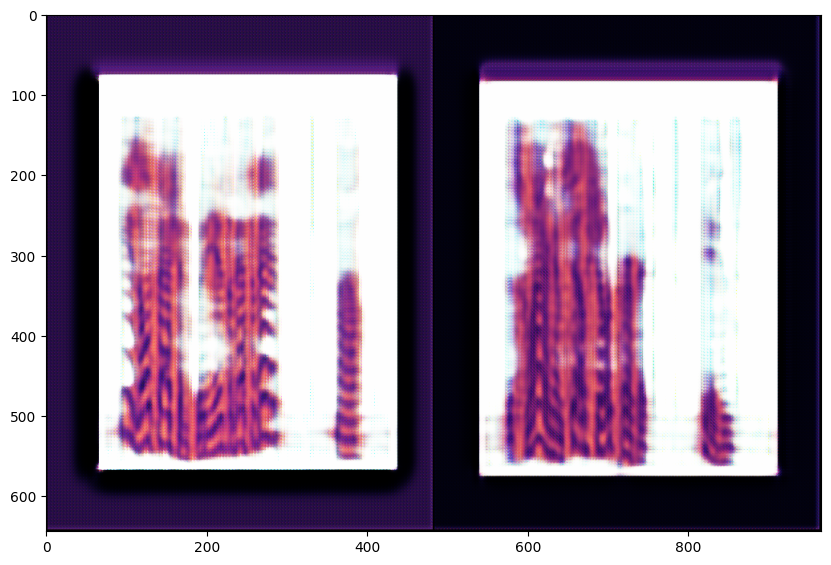

torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1,

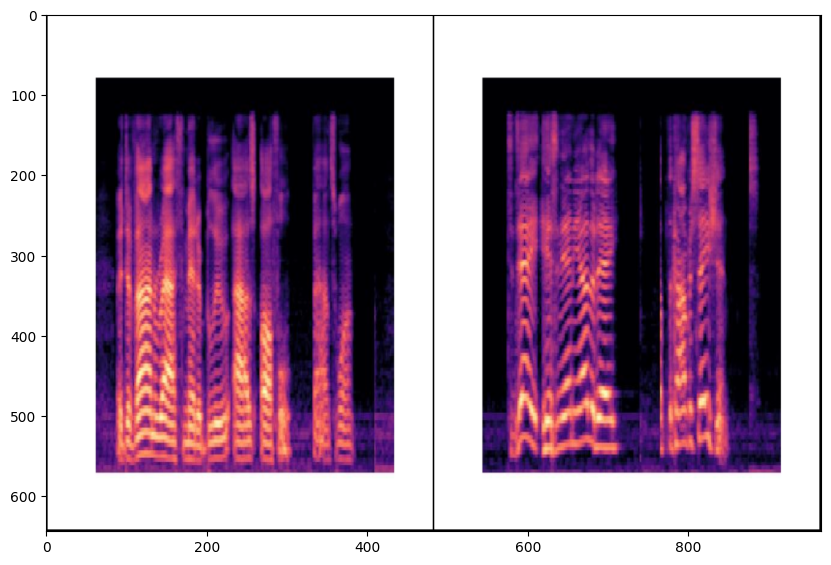

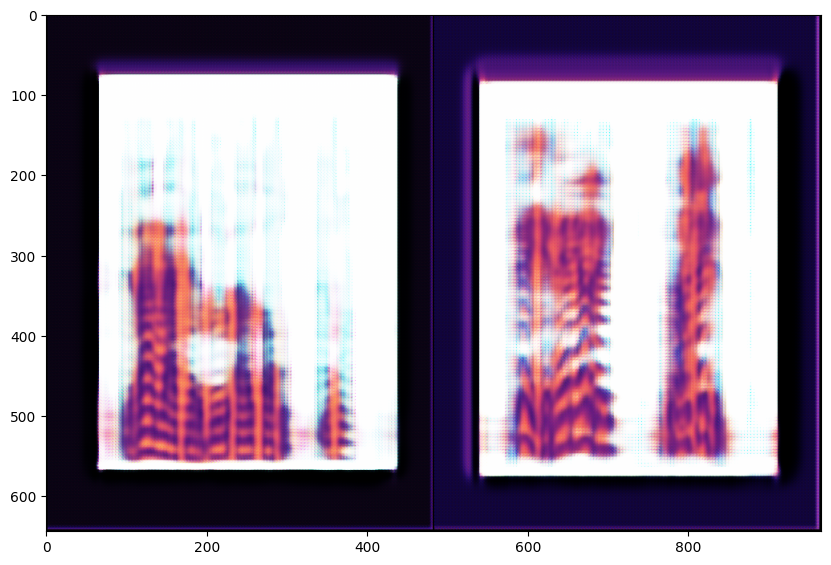

torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1,

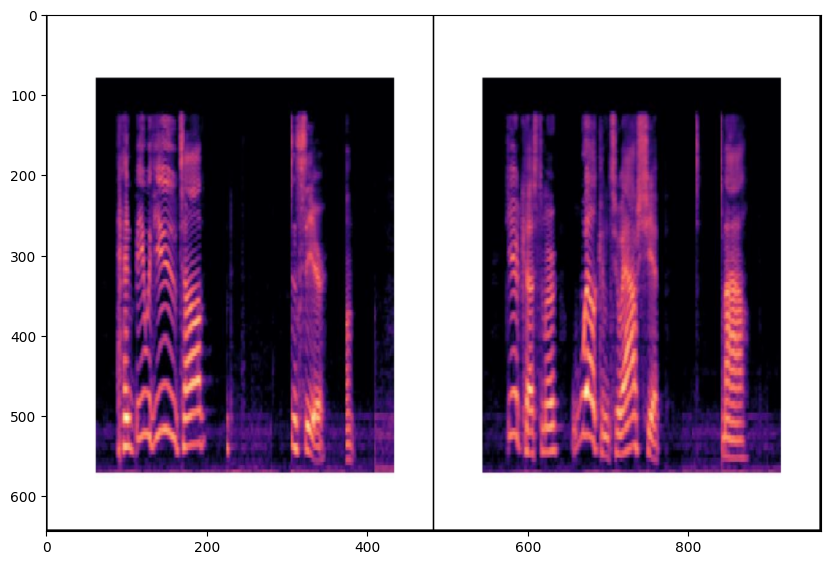

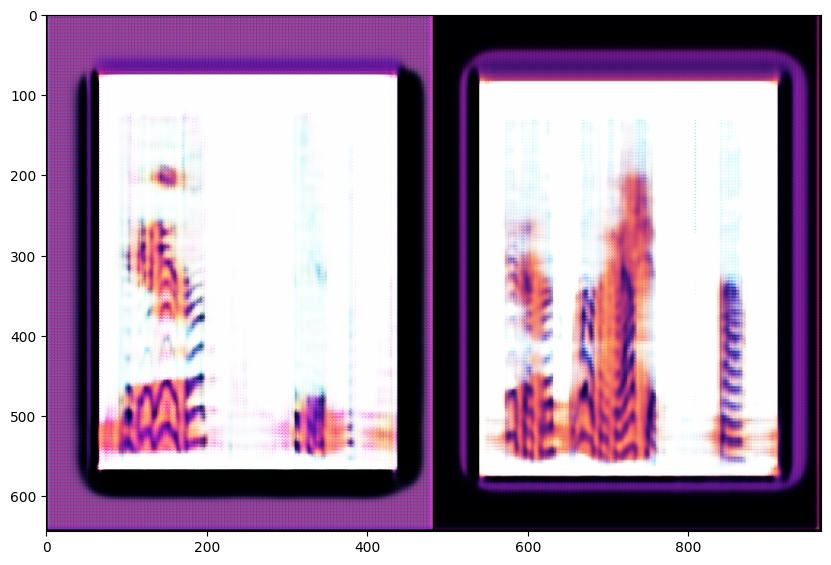

torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1,

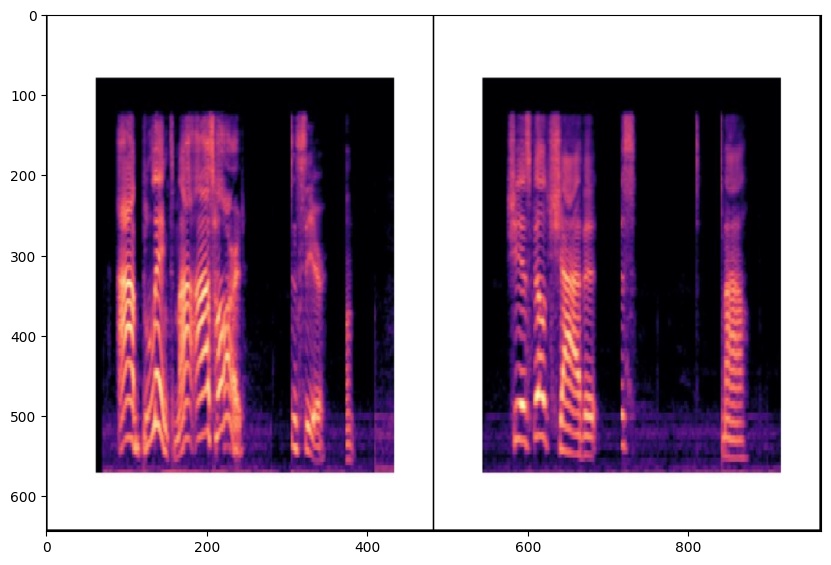

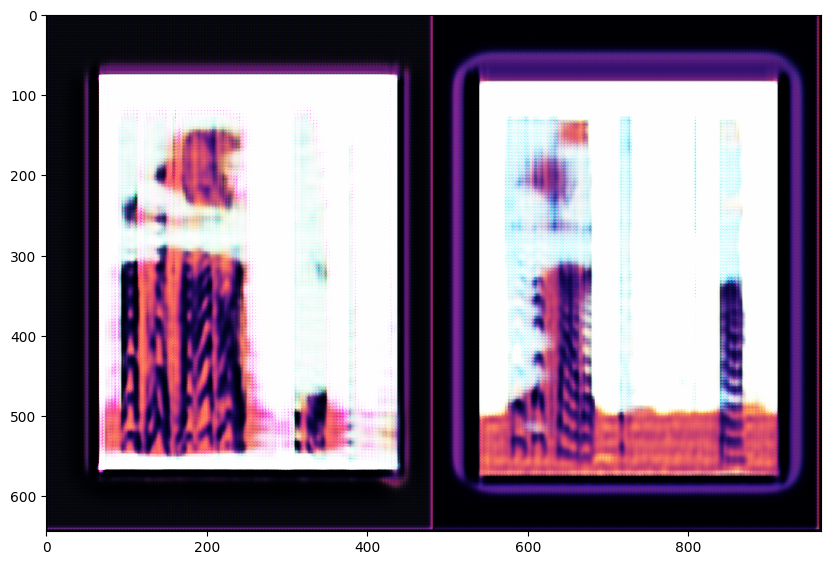

torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1,

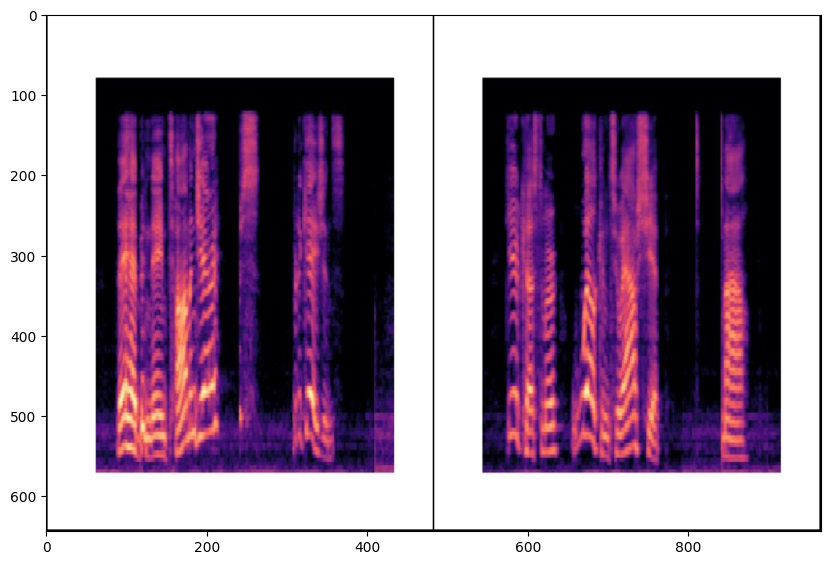

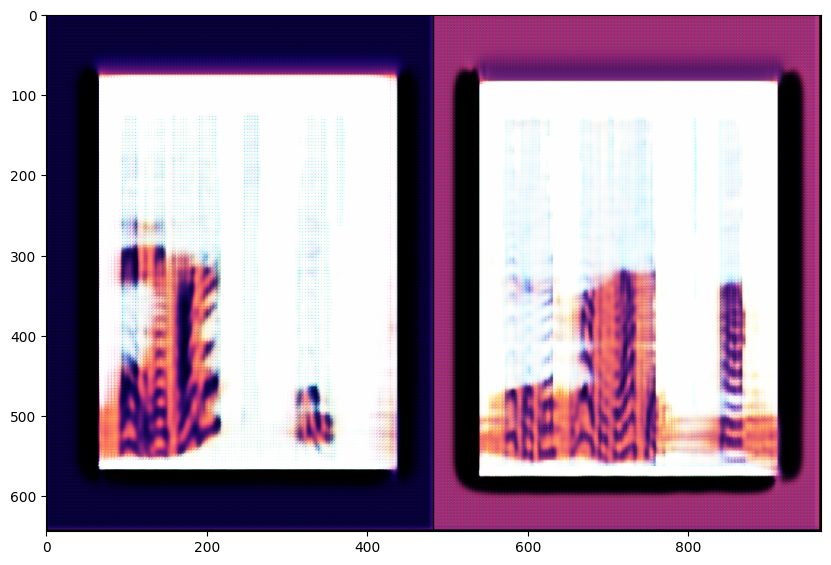

torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1,

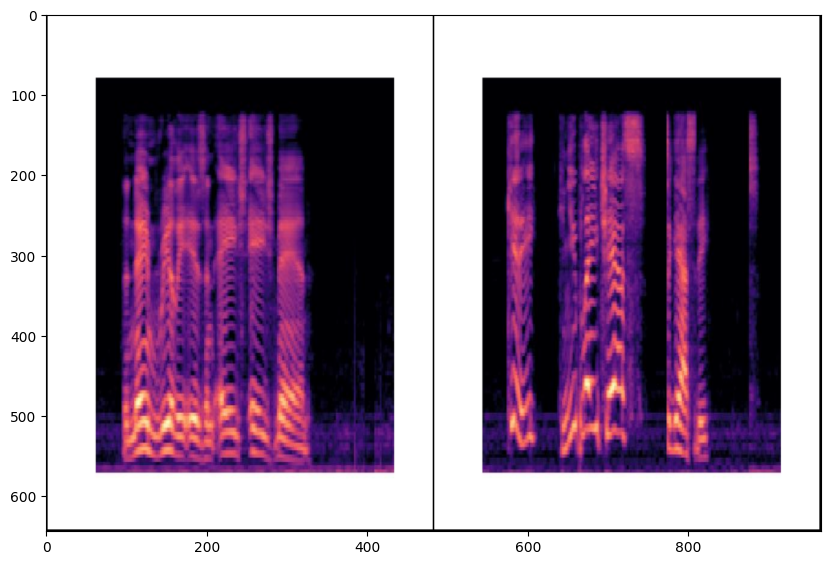

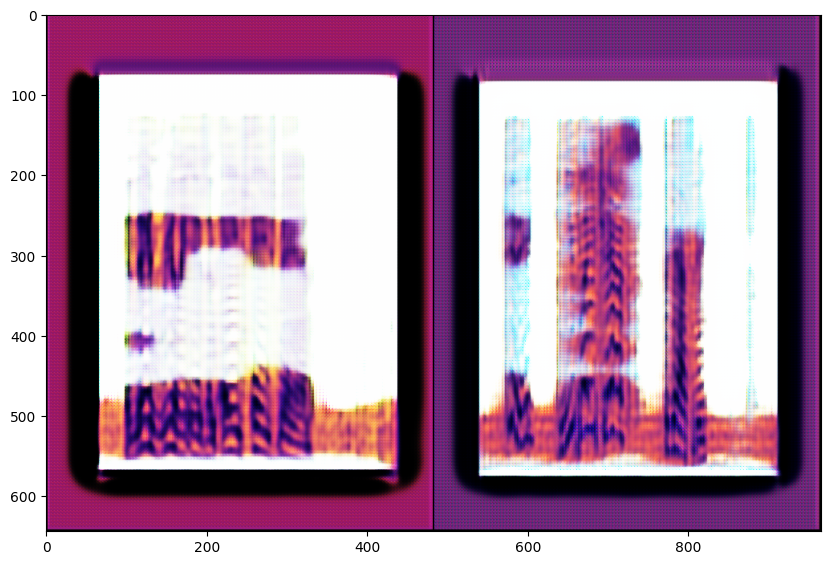

torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1, 3, 640, 480]) torch.Size([1, 3, 640, 480])
torch.Size([1,

In [10]:
from skimage import color
import numpy as np
plt.rcParams["figure.figsize"] = (10, 10)


def train(save_model=False):
    mean_generator_loss = 0
    mean_discriminator_loss = 0
    source_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    target_loader = DataLoader(target, batch_size=batch_size, shuffle=True)

    cur_step = 0

    for epoch in range(n_epochs):

        for real_A, real_B in zip(source_loader,target_loader):
            print(real_A[0].shape, real_B[0].shape)
            real_A = real_A[0]
            real_B = real_B[0]

            real_A = nn.functional.interpolate(real_A, size=target_shape)
            real_B = nn.functional.interpolate(real_B, size=target_shape)
            cur_batch_size = len(real_A)
            real_A = real_A.to(device)
            real_B = real_B.to(device)

            disc_A_opt.zero_grad()
            with torch.no_grad():
                fake_A = gen_BA(real_B)
            disc_A_loss = get_disc_loss(real_A, fake_A, disc_A, adv_criterion)
            disc_A_loss.backward(retain_graph=True)
            disc_A_opt.step()

            disc_B_opt.zero_grad()
            with torch.no_grad():
                fake_B = gen_AB(real_A)
            disc_B_loss = get_disc_loss(real_B, fake_B, disc_B, adv_criterion)
            disc_B_loss.backward(retain_graph=True)
            disc_B_opt.step()

            gen_opt.zero_grad()
            gen_loss, fake_A, fake_B = get_gen_loss(
                real_A, real_B, gen_AB, gen_BA, disc_A, disc_B, adv_criterion, recon_criterion, recon_criterion
            )
            gen_loss.backward()
            gen_opt.step()

            mean_discriminator_loss += disc_A_loss.item() / display_step
            mean_generator_loss += gen_loss.item() / display_step

            ### Visualization code ###
            if cur_step % display_step == 0:
                print(f"Epoch {epoch}: Step {cur_step}: Generator (U-Net) loss: {mean_generator_loss}, Discriminator loss: {mean_discriminator_loss}")
                show_tensor_images(torch.cat([real_A, real_B]), size=(dim_A, target_shape[0], target_shape[1]))
                show_tensor_images(torch.cat([fake_B, fake_A]), size=(dim_B, target_shape[0], target_shape[1]))
                mean_generator_loss = 0
                mean_discriminator_loss = 0
                if save_model:
                    torch.save({
                        'gen_AB': gen_AB.state_dict(),
                        'gen_BA': gen_BA.state_dict(),
                        'gen_opt': gen_opt.state_dict(),
                        'disc_A': disc_A.state_dict(),
                        'disc_A_opt': disc_A_opt.state_dict(),
                        'disc_B': disc_B.state_dict(),
                        'disc_B_opt': disc_B_opt.state_dict()
                    }, f"cycleGAN_{cur_step}.pth")
            cur_step += 1
train()